# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [125]:
import math
import sys

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [127]:
# YOUR CODE HERE
wine_q = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz', sep='\t')
print(wine_q.sample(10))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2526            6.5              0.18         0.33            1.40      0.029   
113             6.7              0.41         0.34            9.20      0.049   
391             6.5              0.36         0.32            1.10      0.031   
2492            6.1              0.28         0.24           19.95      0.074   
4365            6.3              0.19         0.33           10.10      0.063   
1497            6.8              0.27         0.49            1.20      0.044   
1478            7.9              0.22         0.24            4.60      0.044   
3210            5.8              0.33         0.23            5.00      0.053   
1983            7.6              0.20         0.30           14.20      0.056   
3490            7.6              0.31         0.24            1.80      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2526                 35.0      

YOUR ANSWERS HERE:

I loaded the Wine Quality dataset from PMLB copy. I copied the link address and separated the values by '\t' as it is a .tsv file. Below, I displayed the dataset for reference. Since I am using the PMLB copy, I am retricted to only the white wine subset that is contained within it.


In [128]:
wine_q

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [129]:
# YOUR CODE HERE
print(wine_q.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')


|Column| Description|
|--------|-------------|
|fixed aciditiy|Mainly tartaric acid. This affects the wine's total acidity and taste balance.|
|volatile acidity|The acetic acid content. Excess volatile acidity can negatively affect the wine's taste.|
|citric acid|Adds freshness and flavor to the wine. Occurs naturally in small amounts.|
|residual sugar|The amount of sugar left after fermentation. Higher values of residual sugar result in sweeter wines.|
|chlorides|The amount of salt in the wine. High levels of chlorides can negatively impact the taste of the wine.|
|free sulfur dioxide|The amount of sulfur dioxide not bound to other compounds. This protects the wine from microbes and oxidation.|
|total sulfur dioxide|The sum of the free and bound sulfur dioxide. This is used as a perservative in winemaking.|
|density|The wine's mass per volume. This can be reflective of the sugar and alcohol content of the wine.|
|pH|Measures the acidity of the wine. Higher pH leads to more acidic wine.|
|sulphates|Sulphates help to prevent spoiling and oxidation; overall contribute to the preservation of the wine.|
|alcohol|The alcohol percentage of the wine. This directly affects the flavor of the wine.|
|target|The quality score given to the wine. This is the variable that is being analyzed.|

*sources referenced:* <sup>[1][2][3]<sup>

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

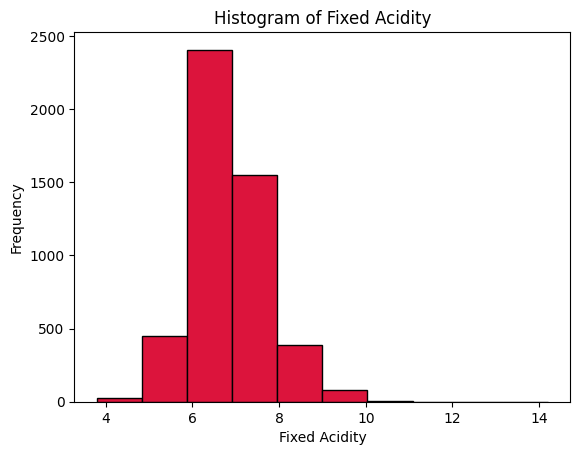

In [130]:
# YOUR CODE HERE
FA = wine_q['fixed acidity']
FA.hist(bins=10, color='crimson', edgecolor='black')
plt.title('Histogram of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [131]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(FA.mean())
print(FA.median())
print(FA.mode())

6.854787668436097
6.8
0    6.8
Name: fixed acidity, dtype: float64


##### Fixed Acidity: Normal distribution

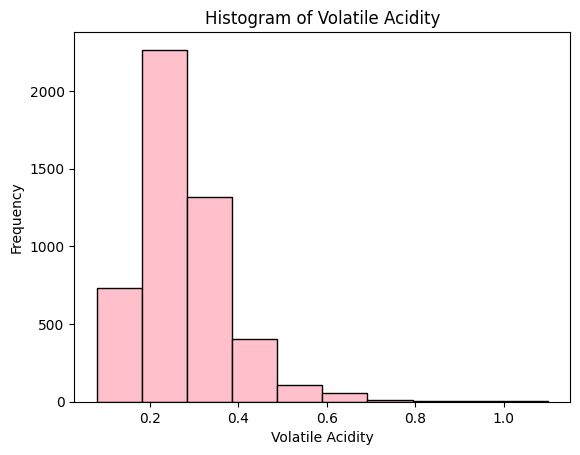

In [132]:
VA = wine_q['volatile acidity']
VA.hist(bins=10, color='pink', edgecolor='black')
plt.title('Histogram of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [133]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(VA.mean())
print(VA.median())
print(VA.mode())

0.27824111882400976
0.26
0    0.28
Name: volatile acidity, dtype: float64


##### Volatile Acidity: Right-skewed distribution

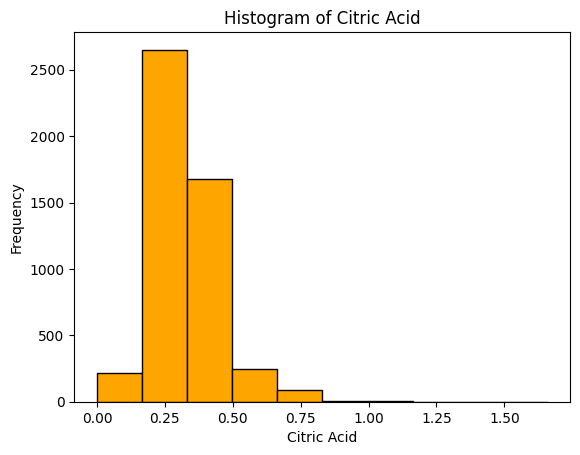

In [134]:
CA = wine_q['citric acid']
CA.hist(bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [135]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(CA.mean())
print(CA.median())
print(CA.mode())

0.33419150673744386
0.32
0    0.3
Name: citric acid, dtype: float64


##### Citric Acid: Normal distribution

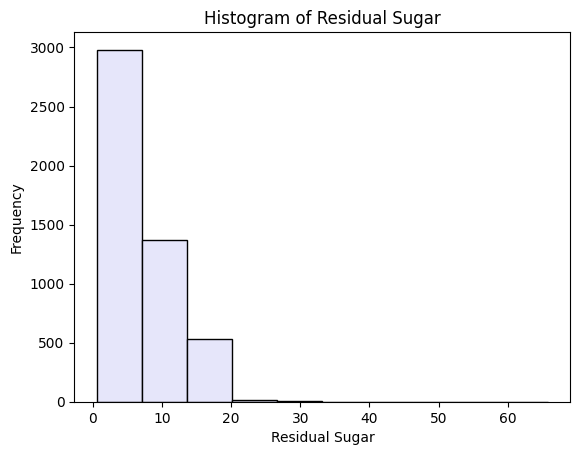

In [136]:
RS = wine_q['residual sugar']
RS.hist(bins=10, color='lavender', edgecolor='black')
plt.title('Histogram of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [137]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(RS.mean())
print(RS.median())
print(RS.mode())

6.391414863209474
5.2
0    1.2
Name: residual sugar, dtype: float64


##### Residual Sugar: Right-skewed distribution

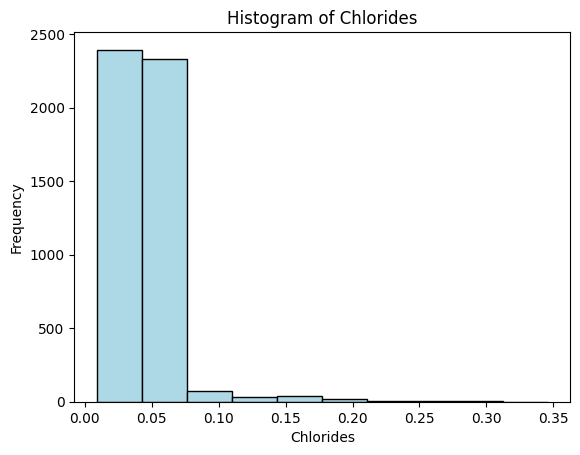

In [138]:
CH = wine_q['chlorides']
CH.hist(bins=10, color='lightblue', edgecolor='black')
plt.title('Histogram of Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [139]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(CH.mean())
print(CH.median())
print(CH.mode())

0.045772356063699456
0.043
0    0.044
Name: chlorides, dtype: float64


##### Chlorides: Normal distribution, slight right-skew

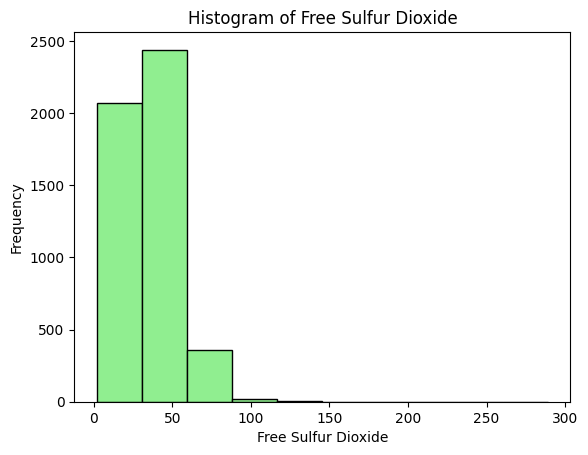

In [140]:
FSD = wine_q['free sulfur dioxide']
FSD.hist(bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Free Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [141]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(FSD.mean())
print(FSD.median())
print(FSD.mode())

35.30808493262556
34.0
0    29.0
Name: free sulfur dioxide, dtype: float64


##### Free Sulfur Dioxide: Right-skewed distribution

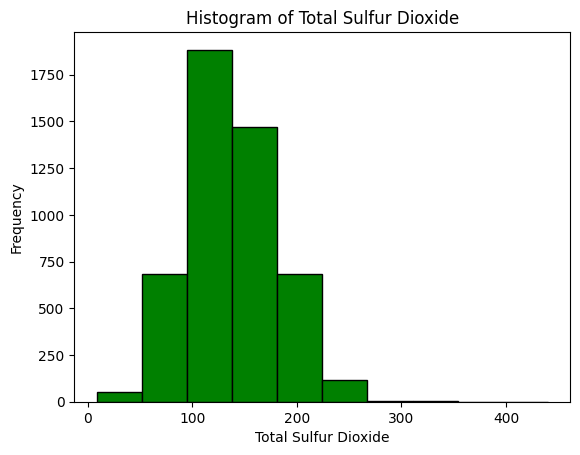

In [142]:
TSD = wine_q['total sulfur dioxide']
TSD.hist(bins=10, color='green', edgecolor='black')
plt.title('Histogram of Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [143]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(TSD.mean())
print(TSD.median())
print(TSD.mode())

138.36065741118824
134.0
0    111.0
Name: total sulfur dioxide, dtype: float64


##### Total Sulfur Dioxide: Right-skewed Distribution

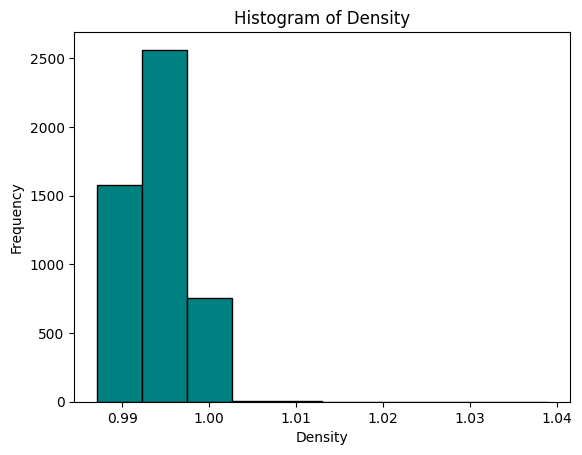

In [144]:
DY = wine_q['density']
DY.hist(bins=10, color='teal', edgecolor='black')
plt.title('Histogram of Density')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [145]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(DY.mean())
print(DY.median())
print(DY.mode())

0.9940273764801959
0.99374
0    0.992
Name: density, dtype: float64


##### Density: Uniform distribution

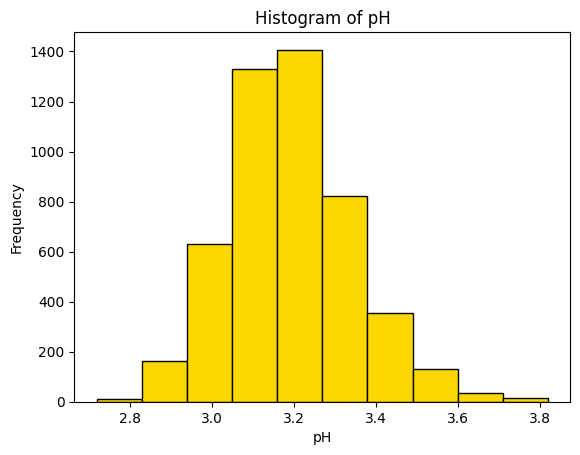

In [146]:
pH = wine_q['pH']
pH.hist(bins=10, color='gold', edgecolor='black')
plt.title('Histogram of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [147]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(pH.mean())
print(pH.median())
print(pH.mode())

3.1882666394446715
3.18
0    3.14
Name: pH, dtype: float64


##### pH: Right-skewed distribution

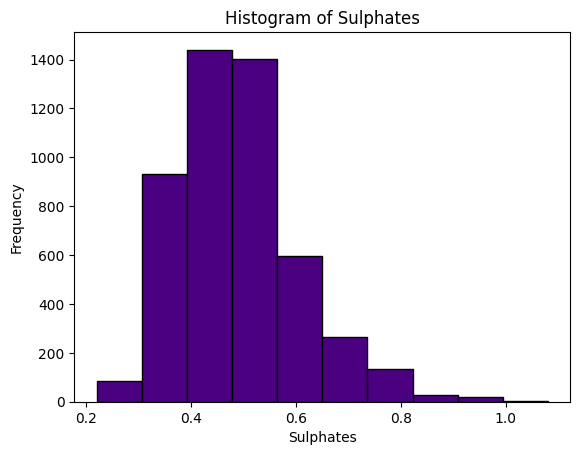

In [148]:
SP = wine_q['sulphates']
SP.hist(bins=10, color='indigo', edgecolor='black')
plt.title('Histogram of Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [149]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(SP.mean())
print(SP.median())
print(SP.mode())

0.48984687627603113
0.47
0    0.5
Name: sulphates, dtype: float64


##### Sulphates: Normal Distribution, slight left-skew

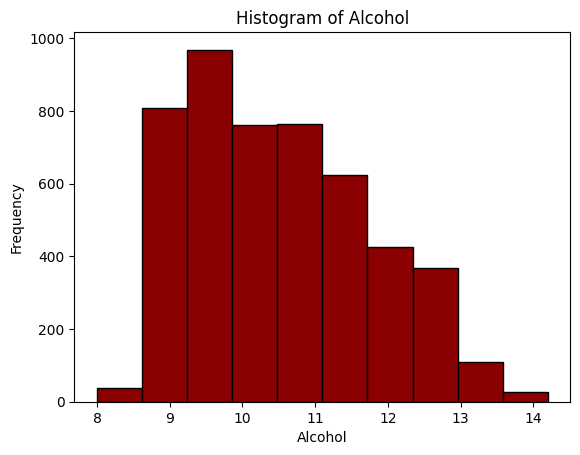

In [150]:
AC = wine_q['alcohol']
AC.hist(bins=10, color='darkred', edgecolor='black')
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [151]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(AC.mean())
print(AC.median())
print(AC.mode())

10.514267047774602
10.4
0    9.4
Name: alcohol, dtype: float64


##### Alcohol: Right-skewed Distribution

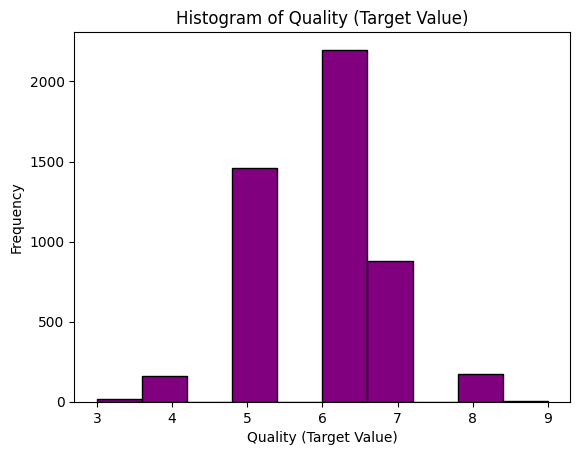

In [152]:
TG = wine_q['target']
TG.hist(bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Quality (Target Value)')
plt.xlabel('Quality (Target Value)')
plt.ylabel('Frequency')
plt.grid(False) #remove gridlines
plt.show()

In [153]:
#to confirm distribution, analyze mean, median, and mode for skew:
print(TG.mean())
print(TG.median())
print(TG.mode())

5.87790935075541
6.0
0    6
Name: target, dtype: int64


##### Target: Discrete Distribution

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

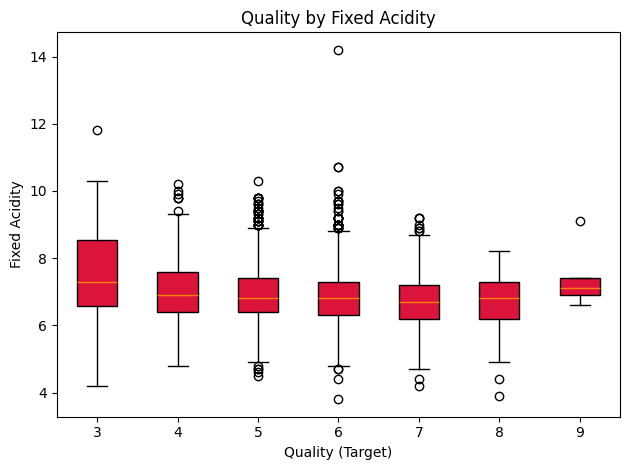

In [154]:
# YOUR CODE HERE
outp = wine_q['target'] #output remains the same for all plots in this question
inp = wine_q['fixed acidity']
data = [wine_q[wine_q['target'] == q]['fixed acidity'] for q in sorted(wine_q['target'].unique())]
#groups input values by each unique quality score.
#using a boxplot 
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
#filling in with color:
colors=['crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'crimson']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
#label graph
plt.xlabel('Quality (Target)')
plt.ylabel('Fixed Acidity')
plt.title('Quality by Fixed Acidity')
plt.tight_layout()
plt.grid(False)
plt.show()

> There does not seem to be a strong visible trend between fixed acidity and quality. The median line remains relatively similiar across each quality level, indicating that fixed aciditiy and quality are independent. 

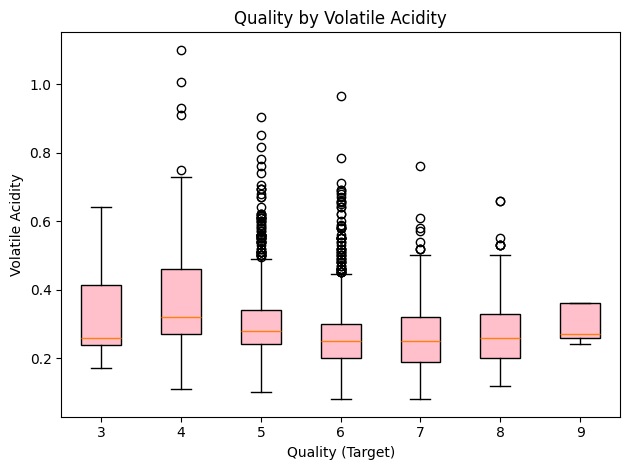

In [155]:
inp = wine_q['volatile acidity']
data = [wine_q[wine_q['target'] == q]['volatile acidity'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Volatile Acidity')
plt.title('Quality by Volatile Acidity')
plt.tight_layout()
plt.grid(False)
plt.show()

> There does not seem to be a strong visible trend between volatile acidity and quality. The median line remains relatively similiar across each quality level, indicating that volatile aciditiy and quality are independent. 

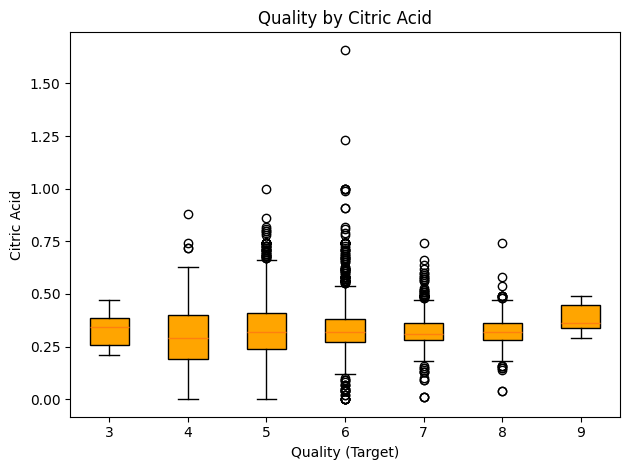

In [156]:
inp = wine_q['citric acid']
data = [wine_q[wine_q['target'] == q]['citric acid'] for q in sorted(wine_q['target'].unique())] 
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Citric Acid')
plt.title('Quality by Citric Acid')
plt.tight_layout()
plt.grid(False)
plt.show()

> There does not seem to be a strong visible trend between citric acid and quality. The median line remains relatively similiar across each quality level, indicating that citric acid and quality are independent. 

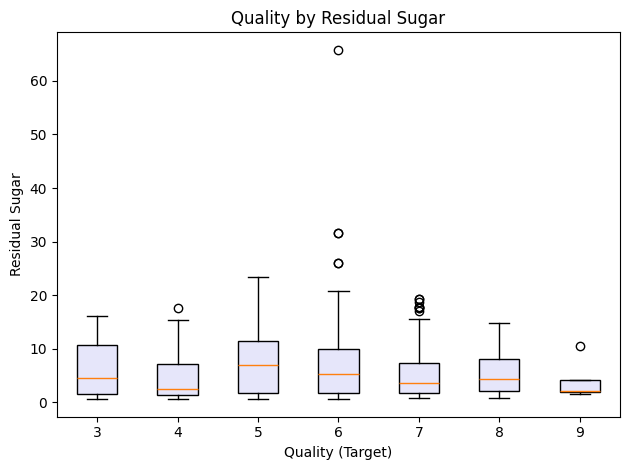

In [157]:
inp = wine_q['residual sugar']
data = [wine_q[wine_q['target'] == q]['residual sugar'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Residual Sugar')
plt.title('Quality by Residual Sugar')
plt.tight_layout()
plt.grid(False)
plt.show()

> There does not seem to be a strong visible trend between residual sugar and quality. The median line remains relatively similiar across each quality level, indicating that residual sugar and quality are independent. 

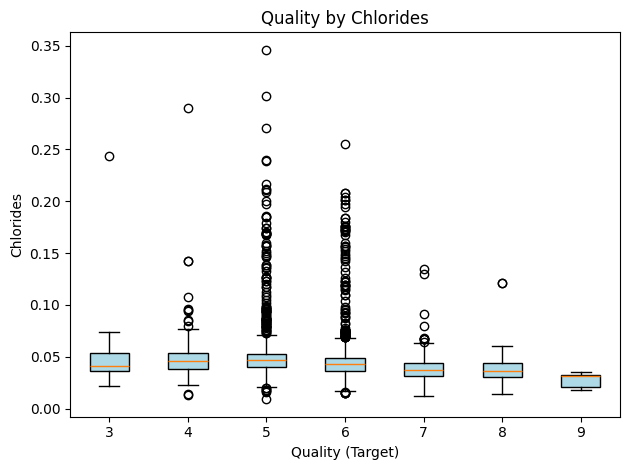

In [158]:
inp = wine_q['chlorides']
data = [wine_q[wine_q['target'] == q]['chlorides'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Chlorides')
plt.title('Quality by Chlorides')
plt.tight_layout()
plt.grid(False)
plt.show()

> The median line for chlorides is mostly stable, with a slight decrease at higher quality levels. The overall pattern is not consistent enough to confirm this decrease as a trend, so quality is independent of chlorides.

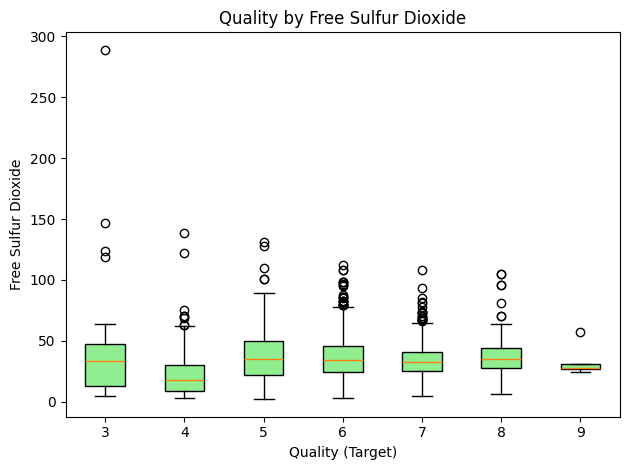

In [159]:
inp = wine_q['free sulfur dioxide']
data = [wine_q[wine_q['target'] == q]['free sulfur dioxide'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Quality by Free Sulfur Dioxide')
plt.tight_layout()
plt.grid(False)
plt.show()

> Although the median of free sulfur dioxide shows a small dip at quality level 4, the overall distribution remains fairly even across all quality levels. Therefore, quality is independent of free sufur dioxide.

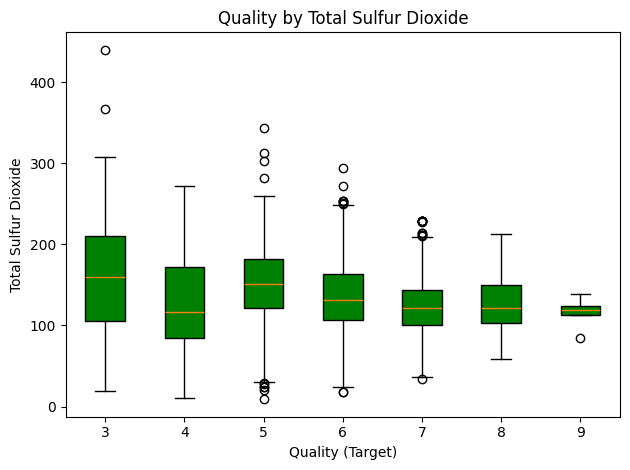

In [160]:
inp = wine_q['total sulfur dioxide']
data = [wine_q[wine_q['target'] == q]['total sulfur dioxide'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Quality by Total Sulfur Dioxide')
plt.tight_layout()
plt.grid(False)
plt.show()

> The media of total sulfur dioxide also presents a slight dip at quality level 4, but the overall trend remains even across quality levels. Therefore,quality is independent of total sulfur dioxide.

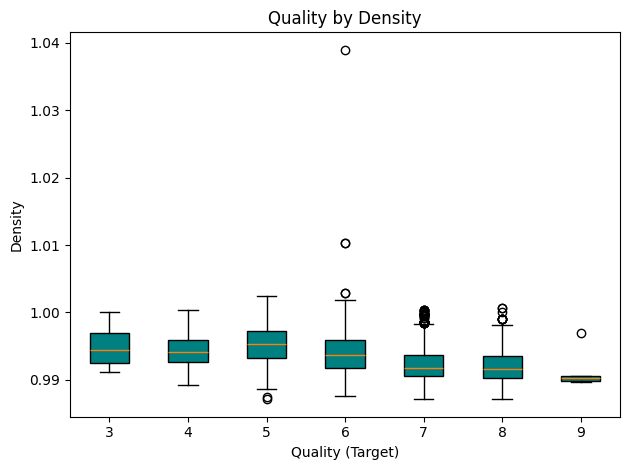

In [161]:
inp = wine_q['density']
data = [wine_q[wine_q['target'] == q]['density'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Density')
plt.title('Quality by Density')
plt.tight_layout()
plt.grid(False)
plt.show()

> The median for density apears to decrease as wine quality increases. This suggests a negative relationship between density and quality, indicating that quality is dependent on density.

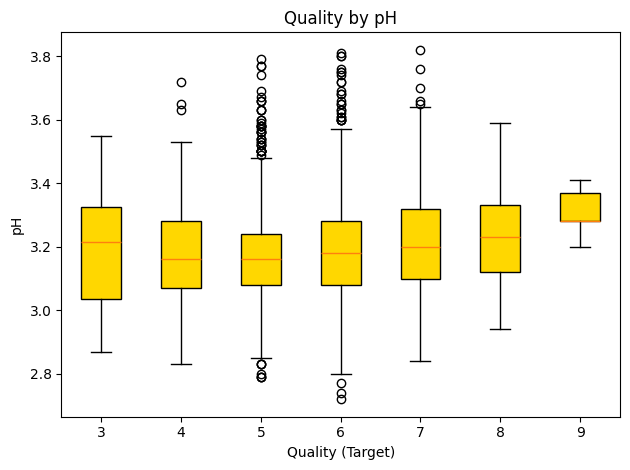

In [162]:
inp = wine_q['pH']
data = [wine_q[wine_q['target'] == q]['pH'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['gold', 'gold', 'gold', 'gold', 'gold', 'gold', 'gold', 'gold']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('pH')
plt.title('Quality by pH')
plt.tight_layout()
plt.grid(False)
plt.show()

> The median for pH shows a slight dip around quality levels 4-6, with the median then increasing as quality level increases. The pattern appears to be non-random indicating that quality is dependent on pH.

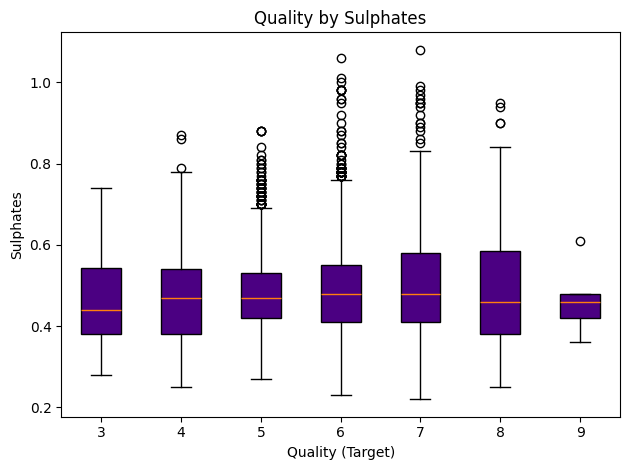

In [163]:
inp = wine_q['sulphates']
data = [wine_q[wine_q['target'] == q]['sulphates'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['indigo', 'indigo', 'indigo', 'indigo', 'indigo', 'indigo', 'indigo', 'indigo']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Sulphates')
plt.title('Quality by Sulphates')
plt.tight_layout()
plt.grid(False)
plt.show()

> There is a slight increase of the median sulphate levels with wine quality. Although the trend is not stttep, the relationship between the two is not random, so I would classify quality as being dependent on sulphates.

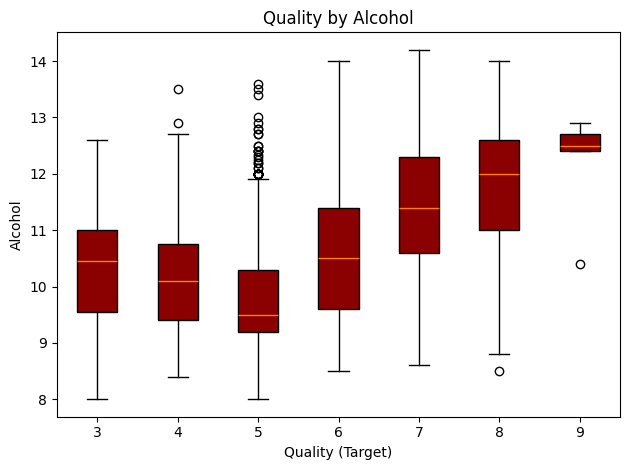

In [164]:
inp = wine_q['alcohol']
data = [wine_q[wine_q['target'] == q]['alcohol'] for q in sorted(wine_q['target'].unique())]
fig,ax = plt.subplots()
boxplt = ax.boxplot(data, tick_labels=sorted(wine_q['target'].unique()), patch_artist=True)
colors=['darkred', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred']
for patch, color in zip(boxplt['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Quality (Target)')
plt.ylabel('Alcohol')
plt.title('Quality by Alcohol')
plt.tight_layout()
plt.grid(False)
plt.show()

> The median alcohol content increases as wine quality increases. There is a notable increase after quality level 5-6. There is a clear, strong pattern here, indicating that quality is dependent on alcohol. Among all of the input features, alcohol shows the clearest relationship to wine quality.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the average loss of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [165]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#drop the target column:
inputs = wine_q.drop("target", axis=1)
quality = wine_q["target"]
#create and train model:
model = LinearRegression()
model.fit(inputs, quality)
#predict using dataset
qual_pred = model.predict(inputs)
#calculate avg loss using mean squared errpe:
avg_L = mean_squared_error(qual_pred, quality)
print(f"Average loss of linear regression model over the whole dataset: {avg_L:.3f}")

Average loss of linear regression model over the whole dataset: 0.563


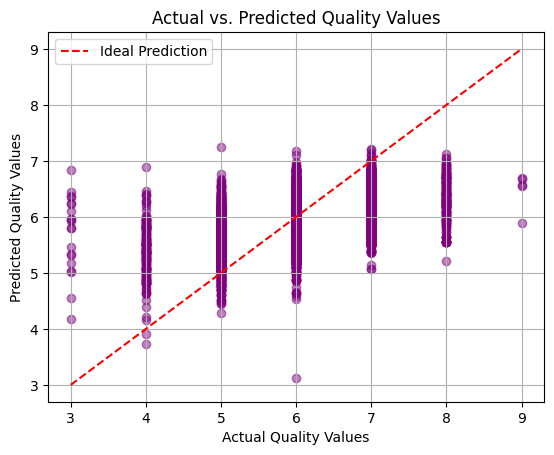

In [166]:
#Plot actual values vs. predicted outputs:
plt.scatter(quality, qual_pred, alpha=0.5, color="purple")
plt.xlabel("Actual Quality Values")
plt.ylabel("Predicted Quality Values")
plt.title("Actual vs. Predicted Quality Values")
plt.plot([quality.min(), quality.max()], [quality.min(), quality.max()], 'r--', label="Ideal Prediction")
plt.grid(True)
plt.legend()
plt.show()

##### The linear regression model overpredicts lower quality wines and underpredicts high-quality wines. This is seen by where the scatter points fall with respect to the ideal prediction line. The general linear regression model trend is upward and regresses towards the mean.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [167]:
# YOUR CODE 
#fit a linear regression to each feature to predict wine quality
#measure mean squared error, compare from column to column
#lowest MSE will be the best linear model:
results = [] #empty list to store results
for col in inputs:
    i_col = inputs[[col]]
    model = LinearRegression()
    model.fit(i_col, quality)
    q_pred = model.predict(i_col) #predict quality
    mse = mean_squared_error(quality, q_pred)
    results.append((col, mse))
results.sort(key=lambda x: x[1]) #sort by lowest MSE
print(results)

[('alcohol', 0.6354137863260801), ('density', 0.7102265148403777), ('chlorides', 0.7496341230508563), ('volatile acidity', 0.7544611777913112), ('total sulfur dioxide', 0.7602516302012771), ('fixed acidity', 0.774064337751404), ('pH', 0.776443165059832), ('residual sugar', 0.7767290354362436), ('sulphates', 0.7819360335229565), ('citric acid', 0.7841290419696332), ('free sulfur dioxide', 0.7841433561228635)]


> The alcohol input column gives the best linear model of quality. This was determined after fitting a linear regression model to each column to predict quality, measuring the mean squared error(average loss), and comparing the mean squared errors (MSEs) to find the lowest value. The column with the lowest MSE is the one that best predicts wine quality, which in this case was the alcohol column.

In [168]:
print(f"Average loss for linear model trained on all input columns: {avg_L:.3f}")
print(f"Average loss for linear model trained on alcohol column: {results[0]}")

Average loss for linear model trained on all input columns: 0.563
Average loss for linear model trained on alcohol column: ('alcohol', 0.6354137863260801)


> The linear model trained on all features (columns) results in a lower average loss, indicating that it gives the best overall prediction. This is likely due to the fact that this model accounts for all features that can possibly affect the wine quality score. The linear model trained on only the 'best' feature, alcohol, resulted in higher average loss than the linear model trained on all features. Although the model trained on the alcohol feature may still return decent results, it will not perform as well as the model trained on all the features. 

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.

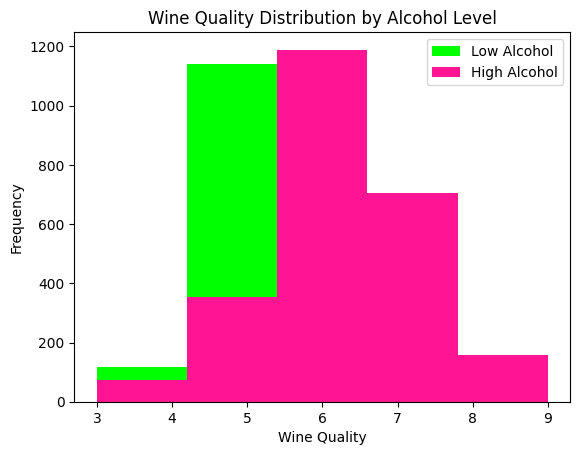

In [169]:
# YOUR CODE HERE
#splitting alcohol into two groups using median:
splt = wine_q['alcohol'].median()
low_alc = wine_q[wine_q['alcohol'] <= splt]
high_alc = wine_q[wine_q['alcohol'] >= splt]
#plot histograms for each group
plt.hist(low_alc['target'], bins=5, label="Low Alcohol", color="lime")
plt.hist(high_alc['target'], bins=5, label="High Alcohol", color="deeppink")
plt.xlabel("Wine Quality")
plt.ylabel("Frequency")
plt.title("Wine Quality Distribution by Alcohol Level")
plt.legend()
plt.show()

> The dataset was split based on the median alcohol content. The histogram reveals that wines with higher alcohol content tend to recieve higher quality scores. This supports the conclusion that wine quality is dependent on alcohol content, since the distribution of quality scores noticeably shifts across the split.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the average training loss of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [170]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#using only input columns, previously defined in problem 5 as inputs
#standardize input data:
scaler = StandardScaler()
inputs_sc = scaler.fit_transform(inputs)
#PCA:
pca = PCA()
inputs_pca = pca.fit_transform(inputs_sc)
#explained variance by principal component
x = pca.explained_variance_ratio_
#sum variance explained by first half of components:
half = 5
var_fhalf = x[:half].sum()
print(f"Total variance explained by the first half principal components: {var_fhalf: .2%}")

Total variance explained by the first half principal components:  72.83%


In [171]:
#build linear regression using coordinates computed from first half of principal components:
half_inputs_pca = inputs_pca[:, :half]
#fit linear regression on PCA data for half of the principal components
model = LinearRegression()
model.fit(half_inputs_pca, quality)
#predict:
pcs_lr = model.predict(half_inputs_pca)
#calculate avg loss:
l = mean_squared_error(quality, pcs_lr)
print(f"Average loss using first 5 principal components: {l:.3f}")

Average loss using first 5 principal components: 0.645


In [172]:
print(f"Average loss of ordinary least squares regression model over the whole dataset: {avg_L:.3f}")

Average loss of ordinary least squares regression model over the whole dataset: 0.563


> The average loss of the linear regression model using the first 5 principal components is higher than that of the ordinary least squares model that uses all features. 

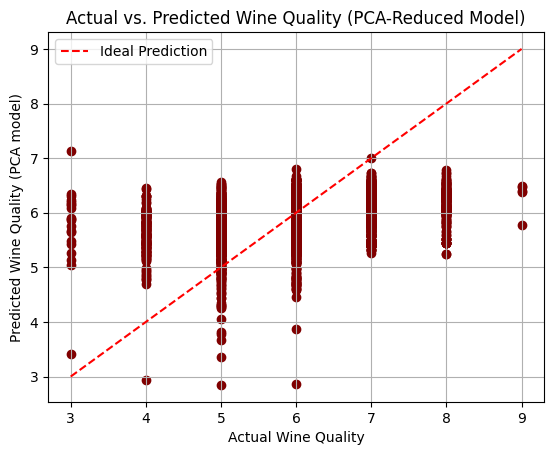

In [173]:
plt.scatter(quality, pcs_lr, color="maroon")
plt.plot([quality.min(), quality.max()], [quality.min(), quality.max()], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality (PCA model)")
plt.title("Actual vs. Predicted Wine Quality (PCA-Reduced Model)")
plt.legend()
plt.grid(True)
plt.show()

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [174]:
# YOUR CODE HERE
#correlation matrix to find which input columns have highest correlation:
c_matrix = inputs.corr().abs() 
np.fill_diagonal(c_matrix.values, 0)
max_corr = c_matrix.max().max() #find maximum correlation value in c_matrix
cpair = np.where(c_matrix == max_corr) #finds highest corr pair
f1 = c_matrix.columns[cpair[0][0]] #column 1
f2 = c_matrix.columns[cpair[1][0]] #column 2
print(f"Highest correlation pair: {f1} and {f2}")

Highest correlation pair: residual sugar and density


In [175]:
#from problem 8:
scaler = StandardScaler()
#input columns:
in_cols = [col for col in wine_q if col != "target"]
inps = wine_q[in_cols].values
inputs_sc = scaler.fit_transform(inps)
#PCA:
pca = PCA()
pca.fit(inputs_sc)
#create dataframe of component matrix of pca:
comp_m = pd.DataFrame(
    pca.components_,
    columns=in_cols,
    index=range(len(in_cols))
)
comp_m[['residual sugar', 'density']]

,residual sugar,density
0,0.427408,0.511524
1,-0.008749,-0.006297
2,0.214320,0.129203
3,-0.273765,-0.022061
4,0.011391,-0.084588
5,-0.289447,-0.327651
6,0.212760,0.110385
7,-0.388186,0.069026
8,0.408969,0.087888
9,0.094468,-0.068374


The first principal component shows that both features have high, positive contributions to the principal component. This indicates that both features are correlated, as the PCA will treat the two features as moving together (having same sign, high values).

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria you like, but you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

##### I chose an outlier by using z-score. The z-score will check how many standard deviations each value is off from the mean. Outliers will be defined as rows where any feature (column) has a z-score greater than 3. This indicates that the feature is more than 3 standard deviations away from the mean. After doing this, I will find th row with the highest overall z-score, which will be the most extreme outlier row. This tow will then be visualized.

In [176]:
# YOUR CODE HERE
#using z-score to find outlier
from scipy.stats import zscore
#z-score will check how many standard deviations each value is off from the mean
z_scores = np.abs(zscore(inputs))
#find rows w z > 3 (typically cutoff for z-score)
mask = (np.abs(z_scores)>3).any(axis=1)
outliers = wine_q[mask]
#find most extreme outlier:
m_out = pd.Series(np.abs(z_scores[mask]).sum(axis=1))
me_index = m_out.idxmax()
me_row = inputs.loc[me_index] #most extreme row
me_row

fixed acidity             6.4000
volatile acidity          0.2300
citric acid               0.3900
residual sugar            1.8000
chlorides                 0.0320
free sulfur dioxide      23.0000
total sulfur dioxide    118.0000
density                   0.9912
pH                        3.3200
sulphates                 0.5000
alcohol                  11.8000
Name: 258, dtype: float64

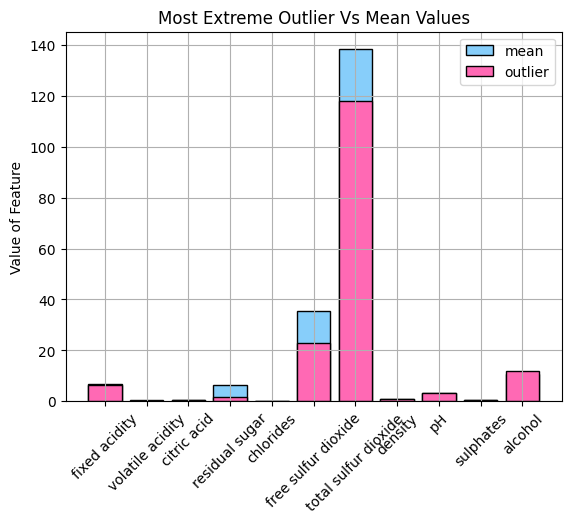

In [177]:
#find average to plot most extreme outlier against:
mean_vals = inputs.mean()
#plot
plt.bar(inputs.columns, mean_vals, label='mean', color='lightskyblue', edgecolor='black')
plt.bar(inputs.columns, me_row, label="outlier", color='hotpink', edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel("Value of Feature")
plt.title("Most Extreme Outlier Vs Mean Values")
plt.legend()
plt.grid(True)
plt.show()

**Sources used:**

<sup>[1]</sup>: https://www.markdownguide.org/cheat-sheet/ 

<sup>[2]</sup>: https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c 

<sup>[3]</sup>: https://waterhouse.ucdavis.edu/whats-in-wine 

<sup>[4]</sup>: https://matplotlib.org/stable/gallery/color/named_colors.html

<sup>[5]</sup>: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html